<a href="https://colab.research.google.com/github/BentheBurema/TM10007_ML_Project_group14/blob/main/hyperparameter_tuningipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment Group 14 Dataset 2


## Importing libraries

In [53]:
# Basic packages
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

# Inspecting dataset
from scipy.stats import kstest

# Splitting dataset
from sklearn import model_selection

# Pre-processing
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing, model_selection, decomposition, svm, feature_selection
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from scipy.stats import skew, kurtosis, norm, kstest
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.stats import linregress, uniform

# Classifiers
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn import tree
from sklearn.metrics import classification_report, auc, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from tabulate import tabulate


In [4]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

  Preparing metadata (setup.py) ... done


## Data loading


In [5]:
# Data loading functions.
!git clone https://github.com/BentheBurema/TM10007_ML_Project_group14.git # ik snap niet waarom we dit doen? timo
from worcliver.load_data import load_data
data = load_data()

fatal: destination path 'TM10007_ML_Project_group14' already exists and is not an empty directory.


## Inspecting data

In [6]:
# Finding the number of missing and incorrect values
print(f"Number of None types: {data.isnull().sum().sum()}")     # Count number of None types
print(f"Number of NaN values: {data.isna().sum().sum()}")       # Count number of NaN values
print(f'The number of samples: {len(data.index)}')              # print number of samples, features and feature names
print(f'The number of features: {len(data.columns)}')

# Check if the dataset is balanced
malignant = (data['label'] == 'malignant').sum()
print(f'The percentage of tumors that is malignant is {(malignant/len(data.index))*100}')

# Check if the data is normally distributed
Y = data['label']
X = data.drop('label', axis=1)

p_values = {}
for key,values in X.items():

  #perform Kolmogorov-Smirnov test on the values and store the p_values
  _, p_value = kstest(values, 'norm')
  # Store the p-value in the dictionary
  p_values[key] = p_value

# Print the p-values
#for key, p_value in p_values.items():
    #print(f"{key}: {p_value}")

# If p<0.05 is not normally distributed, if p>0.05 it is normally distributed
count_less_than_005 = sum(p_value < 0.05 for p_value in p_values.values())
count_greater_than_005 = sum(p_value > 0.05 for p_value in p_values.values())

print(f"Amount of featuers not normally distributed: {count_less_than_005}")
print(f"Amount of features normally distributed: {count_greater_than_005}")



Number of None types: 0
Number of NaN values: 0
The number of samples: 186
The number of features: 494
The percentage of tumors that is malignant is 50.53763440860215
Amount of featuers not normally distributed: 493
Amount of features normally distributed: 0


## Splitting dataset in training set and test set


In [7]:
Y = data['label']
X = data.drop('label', axis=1)

# Split the dataset in training and test part
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
# Check if this is executed correctly
print("Amount samples in X_train (X_train):", X_train.shape[0])
print("Amount samples in X_test  (X_test):", X_test.shape[0])
print("Amount samples in Y_train (Y_train):", Y_train.shape[0])
print("Amount samples in Y_test (Y_test):", Y_test.shape[0])

display(X_train.head())

Amount samples in X_train (X_train): 148
Amount samples in X_test  (X_test): 38
Amount samples in Y_train (Y_train): 148
Amount samples in Y_test (Y_test): 38


,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,PREDICT_original_sf_cvar_std_2.5D,...,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_peak_WL3_N5,PREDICT_original_phasef_phasesym_peak_position_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5
ID,,,,,,,,,,,,,,,,,,,,,
Liver-149_0,0.824583,0.055989,30.099345,4.415992,3.661071,1.861613,0.963279,0.022393,0.021571,0.011780,...,0.000000,0.104107,2.756906,8.453818,0.0,0,0.409805,222.558113,0.042636,11.809102
Liver-132_0,0.801146,0.092439,62.217271,5.375470,6.822246,2.509137,0.924549,0.049767,0.007751,0.002992,...,0.000000,0.100082,3.289330,11.458823,0.0,0,0.412003,2198.965478,0.000000,14.737962
Liver-018_0,0.784347,0.051682,29.057589,5.423131,8.776120,6.493751,0.967914,0.015269,0.035515,0.011933,...,0.015554,0.152348,1.301602,0.810392,0.0,0,0.526233,678.343564,0.211135,12.903202
Liver-135_0,0.762971,0.071214,39.719594,6.220513,8.349609,4.035151,0.944998,0.031507,0.028765,0.017286,...,0.000000,0.108344,1.929157,3.090863,0.0,0,0.391573,1168.726859,0.088960,14.316269
Liver-015_0,0.836579,0.075738,61.507831,7.303462,11.104662,3.733124,0.952526,0.027722,0.016664,0.011443,...,0.000000,0.078725,3.747019,15.215261,0.0,0,0.332604,1306.631943,0.000000,14.384808


## Preprocessing

### Outliers

In [8]:
def define_outliers(X_dataset):
    outliers_total = 0
    for column in X_dataset.columns:
        sorted_feature = np.sort(X_dataset[column])  # Sort the values of the column
        Q1 = np.percentile(sorted_feature, 25)
        Q3 = np.percentile(sorted_feature, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        outliers_total_column = ((sorted_feature < lower_bound) | (sorted_feature > upper_bound)).sum()
        outliers_total += outliers_total_column
    return outliers_total

# Performing the above functions on the train set --> dit kan dus naar het einde van de code als we alle functies op train/test gaan toepassen
outliers_total = define_outliers(X_train)
print(f'In total there are {outliers_total} outliers')



## OUDE CODE
# # Function to check on outliers using interquartile range
# def define_outliers(feature):
#   sorted_feature = np.sort(feature)
#   Q1 = np.percentile(feature, 25)
#   Q3 = np.percentile(feature, 75)
#   IQR = Q3 - Q1
#   lower_bound = Q1 - (1.5 * IQR)
#   upper_bound = Q3 + (1.5 * IQR)
#   outliers = feature[(feature < lower_bound) | (feature > upper_bound)]
#   outliers_total_column = (feature < lower_bound).sum() + (feature > upper_bound).sum()
#   return outliers, outliers_total_column, lower_bound, upper_bound

# # Performing the above functions on the train set --> dit kan dus naar het einde van de code als we alle functies op train gaan toepassen
# outliers_total = 0
# for column in X_train.columns:
#   outliers, outliers_total_column,_,_ = define_outliers(X_train[column])
#   outliers_total += outliers_total_column
#   #print(f'There are {outliers_total_column} outliers in {column}')
#   #print(f'Outliers in column {column}: {outliers.tolist()}')
# print(f'In total there are {outliers_total} outliers')


In total there are 3061 outliers


### RobustScaling



In [9]:
# Function to scale the datasetusing RobustScaler because there are outliers and the features are not normally distributed
def scaling(X_dataset):
  scaler = RobustScaler(quantile_range=(0.1, 0.9)).fit(X_dataset) # first and last 10% of samples are seen as outliers
  scaler.fit(X_dataset)
  X_dataset_scaled = scaler.transform(X_dataset)
  X_dataset_scaled = pd.DataFrame(data=X_dataset_scaled, columns=X_dataset.columns)
  display(X_dataset_scaled)
  return X_dataset_scaled

# Performing the above functions on the train set --> dit kan dus naar het einde van de code als we alle functies op train/test gaan toepassen
X_train_scaled = scaling(X_train)



## oude code
# scaler = RobustScaler(quantile_range=(0.1, 0.9)).fit(X_train) # first and last 10% of samples are seen as outliers
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
# display(X_train_scaled)

,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,PREDICT_original_sf_cvar_std_2.5D,...,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_peak_WL3_N5,PREDICT_original_phasef_phasesym_peak_position_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5
0,0.593449,-0.512787,2.764207,18.824778,-30.273396,-6.262893,0.030864,-2.139842,-3.456042,-0.658069,...,0.000000,-4.059108,3.770219,33.530614,0.0,0.0,-1.448086,-56.600453,-0.012193,-0.934114
1,-0.505103,4.819001,49.685762,79.253830,-7.429916,-2.296391,-0.965440,54.349288,-26.428354,-24.889439,...,0.000000,-5.190570,9.013054,65.130885,0.0,0.0,-1.373211,753.453879,-0.054829,5.029282
2,-1.292538,-1.142711,1.242290,82.255610,6.689289,22.111916,0.150117,-16.840124,19.722419,-0.235484,...,0.015554,9.500316,-10.560298,-46.846717,0.0,0.0,2.517749,130.208697,0.156306,1.293562
3,-2.294474,1.714355,16.818572,132.475634,3.607207,7.051418,-0.439393,16.667383,8.502050,14.523536,...,0.000000,-2.868232,-4.380701,-22.865560,0.0,0.0,-2.069117,331.198189,0.034131,4.170682
4,1.155748,2.376003,48.649332,200.681026,23.515941,5.201310,-0.245742,8.857921,-11.612280,-1.586294,...,0.000000,-11.193331,13.519957,104.633136,0.0,0.0,-4.077755,387.720246,-0.054829,4.310234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,-2.429441,6.000959,-9.320445,-70.747301,22.175531,12.260150,-0.480027,16.259302,-0.998742,-2.573834,...,0.000000,10.919090,-8.269818,-41.658422,0.0,0.0,2.893651,6.156466,0.123238,-1.058700
144,0.083177,-3.677656,-2.529138,-12.922478,-25.206532,-8.069528,-0.063973,-9.299049,-1.650036,-9.234129,...,0.000000,-3.182801,0.863018,8.797954,0.0,0.0,-1.494748,-79.913172,-0.019185,-2.029277
145,3.848175,-1.184536,-17.282969,-163.746650,-10.459304,-13.579521,0.445634,-14.485538,-21.334415,-12.500779,...,0.000000,4.947250,-3.314365,-16.695182,0.0,0.0,1.676575,-69.180839,0.047388,-2.501283
146,-0.499371,4.998171,15.306557,88.777489,8.815968,5.671185,-0.217076,40.146946,5.872943,20.455827,...,0.000000,-11.527585,14.010989,108.728430,0.0,0.0,-4.352899,-70.029644,-0.054829,-1.362260


### Remove zero variance

In [10]:
def zero_variance(X_dataset_scaled):
  # Remove features with zero variance
  vt = VarianceThreshold(threshold=0)
  X_dataset_var = vt.fit_transform(X_dataset_scaled)
  # Selecteer de juiste kolommen uit X_train_scaled
  selected_columns = X_dataset_scaled.columns[vt.get_support()]

  # Maak een DataFrame van de getransformeerde dataset met de geselecteerde kolomnamen
  X_dataset_var = pd.DataFrame(X_dataset_var, columns=selected_columns)
  print(f'The data shape before removing zero variance: {X_dataset_scaled.shape} and after: {X_dataset_var.shape}')
  return X_dataset_var

# Performing the above functions on the train set --> dit kan dus naar het einde van de code als we alle functies op train/test gaan toepassen
X_train_var = zero_variance(X_train_scaled)




## oude code
# # Remove features with zero variance
# vt = VarianceThreshold(threshold=0)
# X_train_var = vt.fit_transform(X_train_scaled)
# # Selecteer de juiste kolommen uit X_train_scaled
# selected_columns = X_train_scaled.columns[vt.get_support()]

# # Maak een DataFrame van de getransformeerde dataset met de geselecteerde kolomnamen
# X_train_var = pd.DataFrame(X_train_var, columns=selected_columns)
# print(f'The data shape before removing zero variance: {X_train_scaled.shape} and after: {X_train_var.shape}')

The data shape before removing zero variance: (148, 493) and after: (148, 476)


### ANOVA test

In [11]:
# Function to perform ANOVA test. ANOVA feature selection for numeric input and categorical output
def anova_analysis(X_dataset_var, Y_dataset):
  # define feature selection
  fs = SelectKBest(score_func=f_classif, k='all')

  # apply feature selection
  X_dataset_anova = fs.fit_transform(X_dataset_var, Y_dataset)
  X_dataset_anova = pd.DataFrame(data=X_dataset_anova, columns=X_dataset_var.columns)
  feature_scores = list(zip(fs.pvalues_, X_dataset_anova.columns))

  # Features selecteren met p-waarde kleiner dan 0.05, want dan is benigne significant verschillend van maligne
  selected_features = [feature[1] for feature in feature_scores if feature[0] < 0.05]

  # Filter de DataFrame om alleen geselecteerde features te behouden
  X_dataset_anova = X_dataset_anova[selected_features]
  print(f'The data shape before ANOVA: {X_dataset_var.shape} and after ANOVA: {X_dataset_anova.shape}')
  return X_dataset_anova

# Performing the above functions on the train set --> dit kan dus naar het einde van de code als we alle functies op train/test gaan toepassen
X_train_anova = anova_analysis(X_train_var, Y_train)





## Oude code
# # define feature selection
# fs = SelectKBest(score_func=f_classif, k='all')

# ## apply feature selection
# X_train_anova = fs.fit_transform(X_train_var, Y_train)
# X_train_anova = pd.DataFrame(data=X_train_anova, columns=X_train_var.columns)
# feature_scores = list(zip(fs.pvalues_, X_train_anova.columns))

# # Features selecteren met p-waarde kleiner dan 0.05, want dan is benigne significant verschillend van maligne
# selected_features = [feature[1] for feature in feature_scores if feature[0] < 0.05]

# # Filter de DataFrame om alleen geselecteerde features te behouden
# X_train_anova = X_train_anova[selected_features]
# print(f'The data shape before ANOVA: {X_train_var.shape} and after ANOVA: {X_train_anova.shape}')

The data shape before ANOVA: (148, 476) and after ANOVA: (148, 61)


### PCA


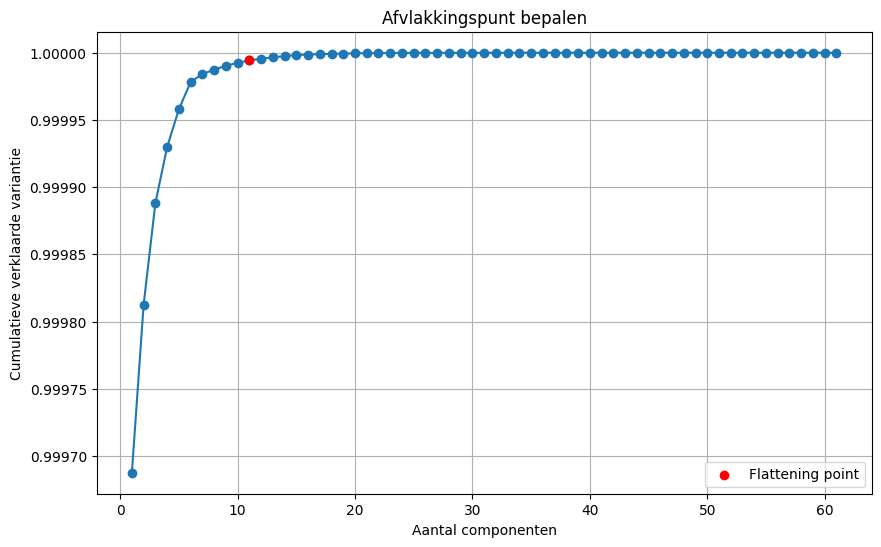

Beste aantal componenten (Afvlakkingspunt-methode): 11
The data shape before PCA: (148, 61) and after: (148, 11)


In [28]:
def find_optimal_components_flattening(X_dataset_anova, window_size, slope_threshold):
    pca = PCA()
    pca.fit(X_dataset_anova)
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

    # Pas stuksgewijze lineaire regressie toe op de cumulatieve verklaarde variantiecurve
    slopes = []
    for i in range(window_size // 2, len(cumulative_variance_ratio) - window_size // 2):
        x = np.arange(i - window_size // 2, i + window_size // 2 + 1)
        y = cumulative_variance_ratio[i - window_size // 2:i + window_size // 2 + 1]
        slope, _, _, _, _ = linregress(x, y)
        slopes.append(slope)

    # Vind het punt waar de helling van de regressielijn significant verandert
    for i, slope in enumerate(slopes):
        if slope < slope_threshold:
            change_point_index = i + window_size // 2
            break

    flattening_point_x = change_point_index + 1
    flattening_point_y = cumulative_variance_ratio[change_point_index]

    # Plot de cumulatieve verklaarde variantie en de regressielijn
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
    plt.title('Afvlakkingspunt bepalen')
    plt.xlabel('Aantal componenten')
    plt.ylabel('Cumulatieve verklaarde variantie')
    plt.grid(True)
    plt.scatter(flattening_point_x, flattening_point_y, color='red', label='Flattening point', zorder=5)  # Verhoog de z-index
    plt.legend()
    plt.show()

    return flattening_point_x

def PCA_analysis(X_dataset_anova,best_n_compontents):
  # Initialiseer PCA met het beste aantal componenten
  pca = PCA(n_components=best_n_components)
  # Pas PCA toe op je trainingsgegevens
  X_dataset_pca = pca.fit_transform(X_dataset_anova)
  print(f'The data shape before PCA: {X_dataset_anova.shape} and after: {X_dataset_pca.shape}')
  return X_dataset_pca

# Performing the above functions on the train set --> dit kan dus naar het einde van de code als we alle functies op train/test gaan toepassen
best_n_components = find_optimal_components_flattening(X_train_anova, window_size=20, slope_threshold=0.01)  # Vergroot het venster naar 10 punten
print("Beste aantal componenten (Afvlakkingspunt-methode):", best_n_components)
X_train_pca = PCA_analysis(X_train_anova, best_n_components)


## OUDE CODE (de functie van find_optimal_components_flattening was al zo goed als goed)
# # Initialiseer PCA met het beste aantal componenten
# pca = PCA(n_components=best_n_components)

# # Pas PCA toe op je trainingsgegevens
# X_train_pca = pca.fit_transform(X_train_anova)


# print(f'The data shape before PCA: {X_train_anova.shape} and after: {X_train_pca.shape}')

## Classifiers

### Create functions which are used in the classifiers

In [18]:
# Function to initialize label encoder
def label_encoder(Y_dataset):
  label_encoder = LabelEncoder()

  # Apply label encoder on Y_train to transform categorical input to numeric input. Malignant = 1, benigne = 0
  Y_dataset_encoded = label_encoder.fit_transform(Y_dataset)

  # Define the coded classes
  print("Coded classes:", label_encoder.classes_)
  return Y_dataset_encoded

# Performing the above functions on the train set --> dit kan dus naar het einde van de code als we alle functies op train/test gaan toepassen
Y_train_encoded = label_encoder(Y_train)

Coded classes: ['benign' 'malignant']


In [19]:
# Creating way of scoring
f2_scorer = make_scorer(fbeta_score, beta=2)
cv = StratifiedKFold(n_splits=5)

### K-NN

In [68]:
def KNN(X_dataset_pca, Y_dataset_encoded):
  # Define a parameter grid for RandomizedSearchCV
  parameter_grid = {'n_neighbors': list(range(5, 20)),
                    'weights': ['uniform','distance'],
                    'p': list(range(1, 10)),
                    'algorithm': ['ball_tree','kd_tree','brute','auto']
                    }

  # Create a RandomizedSearchCV and apply it to the dataset with crossvalidation
  rscv_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=parameter_grid, n_iter=40, cv=cv, random_state=0, scoring=f2_scorer)

  # Fit the classifier
  rscv_knn.fit(X_dataset_pca, Y_dataset_encoded)

  # Extract the best parameters and show the F2-score
  print('Best parameters found:', rscv_knn.best_params_)
  print('Best F2-score found:', rscv_knn.best_score_)

  # Fit the classifier with the best parameters on the dataset
  knn_classifier = rscv_knn.best_estimator_
  knn_classifier.fit(X_dataset_pca, Y_dataset_encoded)
  return rscv_knn, knn_classifier

# Performing the above functions on the train set --> dit kan dus naar het einde van de code als we alle functies op train/test gaan toepassen
RSCV_KNN, KNN_classifier = KNN(X_train_pca, Y_train_encoded)





## OUDE CODE + extra deel over waar ik (Benthe) de kriebels van krijg ;)
# # Maak een parameter grid voor RandomizedSearchCV
# param_dist = {'n_neighbors': list(range(5, 20)),
#               'weights': ['uniform','distance'],
#               'p': list(range(1, 10)),
#               'algorithm': ['ball_tree','kd_tree','brute','auto']}

# # Maak een RandomizedSearchCV-object en pas het toe op je trainingsdata met kruisvalidatie
# RSCV_KNN = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=0, scoring=f2_scorer)  # 5-voudige kruisvalidatie
# RSCV_KNN.fit(X_train_pca, Y_train_encoded)

# # Bekijk de beste parameters en beste score
# print("Beste parameters gevonden: ", RSCV_KNN.best_params_)
# print("Beste cross-validation score: {:.2f}".format(RSCV_KNN.best_score_))

# Niet doen dit dan krijgt Benthe de kriebels!!!
# # Bekijk prestaties van het beste model met kruisvalidatie op de hele dataset
# best_knn = random_search.best_estimator_
# cv_scores = cross_val_score(best_knn, X_test, Y_test, cv=5)  # 5-voudige kruisvalidatie
# print("Gemiddelde cross-validation score op de hele dataset: {:.2f}".format(np.mean(cv_scores)))

Best parameters found: {'weights': 'uniform', 'p': 6, 'n_neighbors': 9, 'algorithm': 'kd_tree'}
Best F2-score found: 0.5917846191818795


### Decision Tree Classifier

In [90]:
def DTC(X_dataset_pca, Y_dataset_encoded):
  # Define a parameter grid for RandomizedSearchCV
  parameter_grid = {"max_depth": np.arange(5,25,5),
                    "min_samples_split": np.arange(2,10,1),
                    'min_samples_leaf': np.arange(2,10,2),
                    'max_leaf_nodes': np.arange(2,20,2),
                    "criterion": ['gini', 'entropy', 'log_loss'],
                    "splitter": ['best', 'random'],
                    }

  # Create a RandomizedSearchCV and apply it to the dataset with crossvalidation
  rscv_dtc = RandomizedSearchCV(tree.DecisionTreeClassifier(), param_distributions=parameter_grid, refit=True, verbose=1, scoring=f2_scorer, cv=cv, random_state=0, n_iter=40)

  # Fit the classifier
  rscv_dtc.fit(X_dataset_pca, Y_dataset_encoded)

  # Extract the best parameters and show the F2-score
  print('Best parameters found:', rscv_dtc.best_params_)
  print('Best F2-score found:', rscv_dtc.best_score_)

  # Fit the classifier with the best parameters on the dataset
  dtc_classifier = rscv_dtc.best_estimator_
  dtc_classifier.fit(X_dataset_pca, Y_dataset_encoded)
  return rscv_dtc, dtc_classifier

# Performing the above functions on the train set --> dit kan dus naar het einde van de code als we alle functies op train/test gaan toepassen
RSCV_DTC, DTC_classifier = DTC(X_train_pca, Y_train_encoded)




## OUDE CODE
# # Define hyperparameter grid
# parameters_DTC = {
#     "criterion": ['gini', 'entropy', 'log_loss'],
#     "splitter": ['best', 'random'],
#     "max_depth": tuple(range(5,50,5)),
#     "min_samples_split": [2,3,4]
# }

# # Define parameters for RandomizedSearchCV
# f2_scorer = make_scorer(fbeta_score, beta=2)
# DTC = tree.DecisionTreeClassifier()

# # pred_DTC = DTC.predict(X_train_pca)
# # print(classification_report(Y_train_encoded, pred_DTC))

# # Perform the RandomizedSearchCV for decision tree classifier
# RSCV_DTC = RandomizedSearchCV(
#     estimator=DTC, param_distributions=parameters_DTC, refit=True, verbose=1, scoring=f2_scorer, cv=StratifiedKFold(5), random_state=0, n_iter=15
#     )

# # Fit the classifier
# RSCV_DTC.fit(X_train_pca,Y_train_encoded)

# # Extract the best parameters and show the F2-score
# print('Best parameters found:', RSCV_DTC.best_params_)
# print('Best F2-score found:', RSCV_DTC.best_score_)

# # Fit the classifier with the best parameters on the dataset
# DTC_classifier = RSCV_DTC.best_estimator_
# DTC_classifier.fit(X_train_pca, Y_train_encoded)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found: {'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_leaf_nodes': 14, 'max_depth': 5, 'criterion': 'entropy'}
Best F2-score found: 0.6779302191582215


## RandomForest Classifier

In [81]:

def RFC(X_dataset_pca, Y_dataset_encoded):
  # Define a parameter grid for RandomizedSearchCV
  parameter_grid = {'n_estimators': np.arange(50,300,20),
                    'max_depth': np.arange(5,25,5),
                    'min_samples_split': np.arange(2,10,1),
                    'min_samples_leaf': np.arange(1,10,1)
                    }


      # 'n_estimators': np.arange(50, 300, 50),
      #               'criterion': ['gini','entropy'],
      #               'max_depth': np.arange(5,25,5),
      #               'max_leaf_nodes': np.arange(2,20,2),
      #               'min_samples_split': np.arange(2,10,1),
      #               'min_samples_leaf': np.arange(1,10,1),
      #               'bootstrap': [True,False]
      #               }

  # Create a RandomizedSearchCV and apply it to the dataset with crossvalidation
  rscv_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=parameter_grid, cv=cv, n_iter=40, scoring=f2_scorer, random_state=0)

  # Fit the classifier
  rscv_rf.fit(X_dataset_pca, Y_dataset_encoded)

  # Extract the best parameters and show the F2-score
  print('Best parameters found:', rscv_rf.best_params_)
  print('Best F2-score found:', rscv_rf.best_score_)

  # Fit the classifier with the best parameters on the dataset
  rf_classifier = rscv_rf.best_estimator_
  rf_classifier.fit(X_dataset_pca, Y_dataset_encoded)
  return rscv_rf, rf_classifier

# Performing the above functions on the train set --> dit kan dus naar het einde van de code als we alle functies op train/test gaan toepassen
RSCV_RF, RF_classifier = RFC(X_train_pca, Y_train_encoded)







## OUDE CODE
# # Define hyperparameter grid
# parameter_grid = {
#     'n_estimators': np.arange(50, 500, 50),
#     'max_features': ['sqrt','log2',None],
#     'max_depth': np.arange(5,50,5),
#     'min_samples_split': [2, 4],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True,False]
# }

# # Define parameters for RandomizedSearchCV
# f2_scorer = make_scorer(fbeta_score, beta=2)
# rf = RandomForestClassifier()
# cv = StratifiedKFold(n_splits=5)

# # Perform the RandomizedSearchCV
# RSCV_RF = RandomizedSearchCV(estimator=rf, param_distributions=parameter_grid, cv=cv, n_iter=40, scoring=f2_scorer, random_state=0)

# # Fit the classifier
# RSCV_RF.fit(X_train_pca, Y_train_encoded)

# # Extract the best parameters and show the F2-score
# print('Best parameters found:', RSCV_RF.best_params_)
# print('Best F2-score found:', RSCV_RF.best_score_)

# # Fit the classifier with the best parameters on the dataset
# rf_classifier = RSCV_RF.best_estimator_
# rf_classifier.fit(X_train_pca, Y_train_encoded)

Best parameters found: {'n_estimators': 270, 'max_depth': 5}
Best F2-score found: 0.6707859078590784


### SVM

In [ ]:
def SVM(X_dataset_pca, Y_dataset_encoded):
  # Define a parameter grid for RandomizedSearchCV
  parameter_grid = {'C': uniform(0.1, 10), # uniform distribution
                    'kernel': ['linear','rbf','poly'],
                    'gamma': ['scale','auto'] + list(np.logspace(-3,3,50))
                    }
  # Create a RandomizedSearchCV and apply it to the dataset with crossvalidation
  rscv_svm = RandomizedSearchCV(SVC(), param_distributions=paramater_grid, n_iter=20, cv=cv, scoring=f2_scorer)

  # Fit the classifier
  rscv_svm.fit(X_dataset_pca, Y_dataset_encoded)

  # Extract the best parameters and show the F2-score
  print('Best parameters found:', rscv_svm.best_params_)
  print('Best F2-score found:', rscv_svm.best_score_)

  # Fit the classifier with the best parameters on the dataset
  svm_classifier = rscv_svm.best_estimator_
  svm_classifier.fit(X_train_pca, Y_train_encoded)
  return rscv_svm, svm_classifier

# Performing the above functions on the train set --> dit kan dus naar het einde van de code als we alle functies op train/test gaan toepassen
RSCV_SVM, SVM_classifier = SVM(X_train_pca, Y_train_encoded)





## OUDE CODE
# # Define large hyperparameter space
# param_dist = {
#     'C': uniform(0.1, 10), # uniform distribution
#     'kernel': ['linear','rbf','poly'],
#     'gamma': ['scale','auto'] + list(np.logspace(-3,3,50))
# }

# # Define parameters for RandomizedSearchCV
# svm = SVC()
# f2_scorer = make_scorer(fbeta_score, beta=2)
# cv = StratifiedKFold(n_splits=5)

# # Create the RandomizedSearchCV object
# RSCV_SVM = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=20, cv=cv, scoring=f2_scorer)

# # Fit the classifier
# RSCV_SVM.fit(X_train_pca, Y_train_encoded)

# # Extract the best parameters and show the F2-score
# print('Best parameters found:', RSCV_SVM.best_params_)
# print('Best F2-score found:', RSCV_SVM.best_score_)

# # Fit the classifier with the best parameters on the dataset
# SVM_classifier = RSCV_SVM.best_estimator_
# SVM_classifier.fit(X_train_pca, Y_train_encoded)

Coded classes: ['benign' 'malignant']


### Learning curves

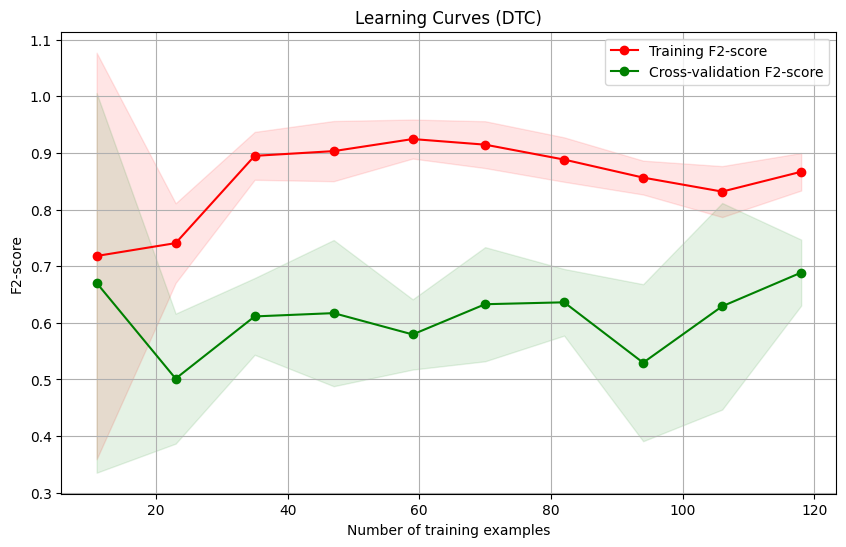

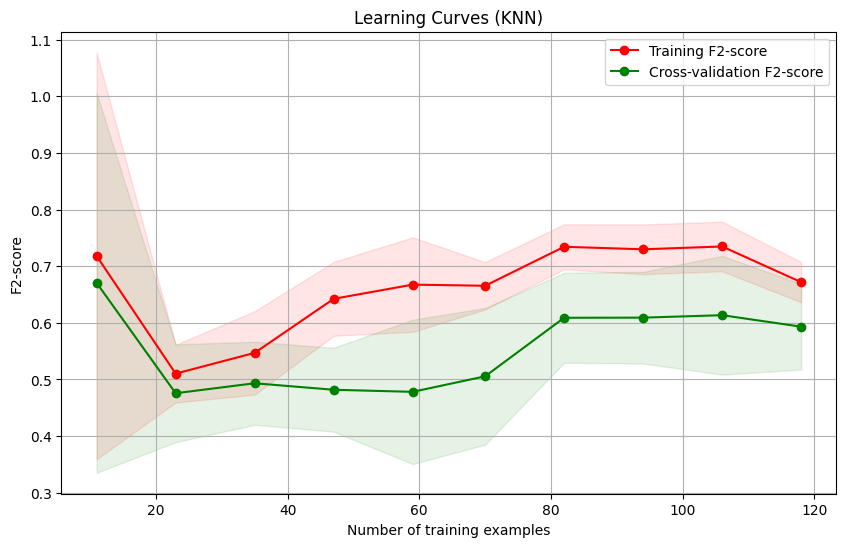

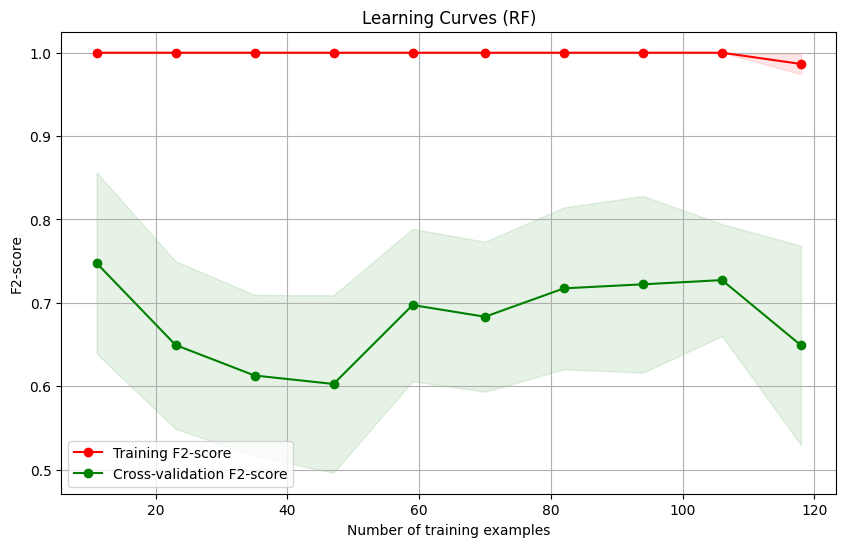

In [91]:
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Plots a learning curve.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of training examples")
    plt.ylabel("F2-score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=f2_scorer, train_sizes=train_sizes, n_jobs=-1, random_state=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training F2-score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation F2-score")

    plt.legend(loc="best")
    return plt

# Definieer de classifiers en de trainingsdata
classifiers = {'Decision tree classifier': DTC_classifier, 'K-NN classifier': KNN_classifier, 'Random forest classifier': RF_classifier} # HIER MOET NOG SVM BIJ
X_train, y_train = X_train_pca, Y_train_encoded

# Plot de learning curves voor elke classifier
for name, clf in classifiers.items():
    title = f"Learning Curves ({name})"
    plot_learning_curve(clf, title, X_train, y_train, cv=5)
    plt.show()

### Scores of the best fitted classifiers
DIT IS OUTER CROSS VALIDATIE VOLGENS MIJ

In [55]:
classifiers = [KNN_classifier, DTC_classifier, RF_classifier]

results = {'Metrics': ['Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F2 Score']}

# Loop through best fitted classifiers, perform cross_validation and calculate the mean scores
for clf in classifiers:
    accuracy = cross_val_score(clf, X_train_pca, Y_train_encoded, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(clf, X_train_pca, Y_train_encoded, cv=cv, scoring='precision_macro').mean()
    recall = cross_val_score(clf, X_train_pca, Y_train_encoded, cv=cv, scoring='recall_macro').mean()
    roc_auc = cross_val_score(clf, X_train_pca, Y_train_encoded, cv=cv, scoring='roc_auc').mean()
    f2_score = cross_val_score(clf, X_train_pca, Y_train_encoded, cv=cv, scoring=f2_scorer).mean()

    # Add classifier names to the table
    clf_name = clf.__class__.__name__
    results[clf_name] = [accuracy, precision, recall, roc_auc, f2_score]

# Create a dataframe of the results
results_df = pd.DataFrame(results)

# Transpose dataframe
results_df.set_index('Metrics', inplace=True)
results_df = results_df.T

# Print table
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                        |      Accuracy      |     Precision      |       Recall       |      ROC AUC       |      F2 Score      |
+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  KNeighborsClassifier  | 0.6013793103448275 | 0.6046927122585017 | 0.6009523809523809 | 0.6385079365079365 | 0.5965233844789478 |
| DecisionTreeClassifier | 0.6022988505747126 | 0.6155354294827979 | 0.608095238095238  | 0.6353015873015873 | 0.6961839965386638 |
| RandomForestClassifier | 0.6342528735632184 | 0.626017316017316  | 0.6476190476190476 | 0.6902857142857142 | 0.6591120124453458 |
+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+


## Comparison of different classifier performances

In [ ]:
## DIT MOET NOG NAAR EEN FUNCTIE OMGEZET WORDEN
# From this point on we use the test dataset to compare the performance of the different clasifiers.
# Grid_XXX contains te results performed by the grid search. Is de fit van X_train Y_train op op het model
# Predict proba geeft een schatting van het aantal juiste klassificaties gemaakt door het systeem.

Y_pred_KNN = RSCV_KNN.predict_proba(X_test)[::,1]
Y_pred_DTC = RSCV_DTC.predict_proba(X_test)[::,1]
Y_pred_RF = RSCV_RF.predict_proba(X_test)[::,1]
# Y_score_SVM = RSCV_SVM.decision_function(X_test) # uitvinden waarom hier de desision function wordt gerbuikt!!

# Calculate ROC curve for each classifier
fpr_KNN, tpr_KNN, _ = roc_curve(Y_test, Y_pred_KNN)
fpr_DTC, tpr_DTC, _ = roc_curve(Y_test,  Y_pred_DTC)
fpr_RF, tpr_RF, _ = roc_curve(Y_test, Y_pred_RF)
# fpr_SVM, tpr_SVM, _ = roc_curve(Y_test,  Y_score_SVM)

# Calculate AUC for each classifier
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
roc_auc_DTC = auc(fpr_DTC, tpr_DTC)
roc_auc_RF = auc(fpr_RF, tpr_RF)
# roc_auc_SVM = auc(fpr_SVM, tpr_SVM)

# Plotting ROC curves and corresponing AUC for all classifiers
plt.figure()
lw = 2
plt.plot(fpr_KNN, tpr_KNN, color='blue',
         lw=lw, label='KNN (AUC = %0.2f)' % roc_auc_KNN)
plt.plot(fpr_DTC, tpr_DTC, color='green',
         lw=lw, label='DTC (AUC = %0.2f)' % roc_auc_DTC)
plt.plot(fpr_RF, tpr_RF, color='yellow',
         lw=lw, label='RF (AUC = %0.2f)' % roc_auc_RF)
# plt.plot(fpr_SVM, tpr_SVM, color='red',
        #  lw=lw, label='SVM (AUC = %0.2f)' % roc_auc_SVM)

# Layout of the plot
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 493 features, but KNeighborsClassifier is expecting 6 features as input.

## Performing functions on training set

In [ ]:
# Pre-processing
outliers_total = define_outliers(X_train)
print(f'In total there are {outliers_total} outliers')
X_train_scaled = scaling(X_train)
X_train_var = zero_variance(X_train_scaled)
X_train_anova = anova_analysis(X_train_var, Y_train)
best_n_components = find_optimal_components_flattening(X_train_anova, window_size=30, slope_threshold=0.01)  # Vergroot het venster naar 10 punten
print("Beste aantal componenten (Afvlakkingspunt-methode):", best_n_components)
X_train_pca = PCA_analysis(X_train_anova, best_n_components)
Y_train_encoded = label_encoder(Y_train)

# Classifiers
RSCV_KNN, KNN_classifier = KNN(X_train_pca, Y_train_encoded)
RSCV_DTC, DTC_classifier = DTC(X_train_pca, Y_train_encoded)
RSCV_RF, RF_classifier = RFC(X_train_pca, Y_train_encoded)
RSCV_SVM, SVM_classifier = SVM(X_train_pca, Y_train_encoded)

## Performing functions on test set